In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import astropy.io.fits as pyfits


In [2]:
from astropy.io import fits
from astropy.table import Table

hdul = fits.open('CD-3527B.fits')
Table(hdul[1].data)


wavelength,flux,flux_uncertainty
float64,float64,float64
1.1,3.52618e-16,1.24451e-17
1.1011,3.5049e-16,1.2229e-17
1.10221,3.49987e-16,1.20214e-17
1.10331,3.48668e-16,1.18047e-17
1.10441,3.47438e-16,1.15857e-17
...,...,...
1.64465,1.2206e-15,2.26694e-17
1.64576,1.22355e-15,2.32347e-17
1.64686,1.22741e-15,2.38191e-17


In [3]:
from astropy.io import fits
import astropy
hdul = astropy.io.fits.open('CD-3527B.fits')
#print(repr(hdul))
fits_image_filename = fits.util.get_testdata_filepath('CD-3527B.fits')
hdul = fits.open('CD-3527B.fits')  # open a FITS file
#hdr = hdul[0].header  # the primary HDU header
#print(hdr[34])
#list(header.keys())

URLError: <urlopen error Unable to open any source! Exceptions were {'http://data.astropy.org/io/fits/tests/data/CD-3527B.fits': <HTTPError 404: 'Not Found'>, 'http://www.astropy.org/astropy-data/io/fits/tests/data/CD-3527B.fits': <HTTPError 404: 'Not Found'>}>

In [4]:
with fits.open('CD-3527B.fits') as hdu:
 
    science_data1 = hdu[1].data
    science_header1 = hdu[1].header
    
    
    science_header1['TTYPE1']
    
print(science_header1)


XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   24 / length of dimension 1                          NAXIS2  =                  500 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    3 / number of table fields                         TTYPE1  = 'wavelength'                                                          TFORM1  = 'D       '                                                            TUNIT1  = 'um      '                                                            TTYPE2  = 'flux    '                                                            TFORM2  = 'D       '                    

In [5]:
import astropy
import seaborn as sns
from astropy.io import fits
fits_image_filename = astropy.io.fits.open('CD-3527B.fits')
hdul = fits.open('CD-3527B.fits')
data = hdul[0].data
header = hdul[0].header
list(header.keys())


['SIMPLE',
 'BITPIX',
 'NAXIS',
 'EXTEND',
 'EXTNAME',
 'VOCLASS',
 'VOPUB',
 'TITLE',
 'OBJECT',
 'RA',
 'DEC',
 'TMID',
 'TELAPSE',
 'SPEC_VAL',
 'SPEC_BW',
 'TDMIN1',
 'TDMAX1',
 'AUTHOR',
 'DATE',
 'INSTRUME',
 'DATE-OBS',
 'REFERENC',
 'TELESCOP',
 'HISTORY',
 'HISTORY']

In [6]:
from astropy.io import fits
hdul = fits.PrimaryHDU()
hdul.header 

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

Filename: CFBDSIR2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   ()      
  1  SPECTRUM      1 BinTableHDU     19   500R x 3C   [D, D, D]   


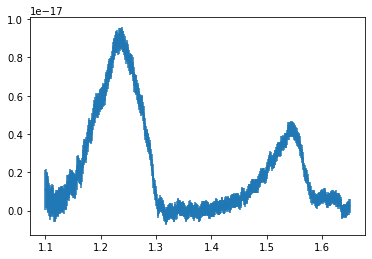

In [7]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

image_file = get_pkg_data_filename('CFBDSIR2.fits')
#fits.info(image_file)
hdul = fits.open(image_file)

hdul.info()
#spectrum = hdul[1].data['wavelength']
plt.errorbar(hdul[1].data['wavelength'],hdul[1].data['flux'],hdul[1].data['flux_uncertainty'])



plt.show()
#print(hdul[1].data['um'])

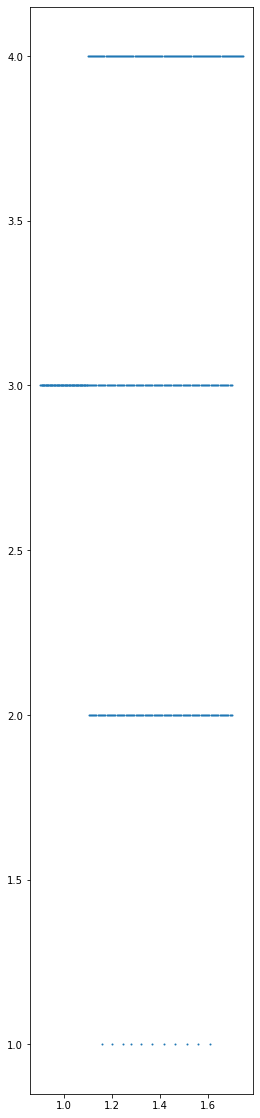

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
nfiles =0
fluxes = np.empty(0)
wavelengths = np.empty(0)
flux_uncertainties = np.empty(0)
spectra_names = np.empty(0)


count = 0
onlyfiles = next(os.walk(os.getcwd()))[2]
for file in onlyfiles:
    if file.lower().endswith('.fits'):
        nfiles +=1
        with fits.open(file, mode='readonly') as hdulist:
            fluxes = np.append(fluxes, hdulist[1].data['flux']+(nfiles*1))
            wavelengths = np.append(wavelengths, hdulist[1].data['wavelength'])
            flux_uncertainties = np.append(flux_uncertainties, hdul[1].data['flux_uncertainty'])
    count +=1
    if count == 4:
        break
            

plt.figure(figsize = (4, 20))
plt.scatter(wavelengths,fluxes, s=1)
plt.show()



segments = nfiles
points_per_segment = 100

#your data preparation will vary
x = np.tile(np.arange(points_per_segment), segments)
z = np.floor(np.arange(points_per_segment * segments)/points_per_segment)
y = np.sin(x * (1 + z))
        
    
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

pal = sns.color_palette()
g = sns.FacetGrid(df, row="z", hue="z", aspect=15, height=.5, palette=pal)
g.map(plt.plot, 'x', 'y')
g.map(plt.axhline, y=0, lw=2, clip_on=False)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.00)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.show()

In [9]:
import os
list = os.listdir(os.getcwd())
number_files = len(list)
print(number_files)

print(onlyfiles)

80
['WASP-33b.fits', 'W2354%2B02.fits', 'W0647-62.fits', 'J0539-00.fits', 'W1639-68.fits', 'fits spectra Manja19.ipynb', 'J1324%2B63.fits', 'J1629%2B03.fits', 'W1542%2B22.fits', 'J2339%2B13.fits', 'W0410%2B15.fits', 'W2209%2B27.fits', '.DS_Store', 'WISE0047.fits', 'J0817-61.fits', 'HD20945b.fits', 'J1821%2B14.fits', 'SOri70.fits', 'W1405%2B55.fits', 'W0825%2B28.fits', 'WASP-4b.fits', 'J0909%2B65.fits', 'W0404-64.fits', 'J0825%2B21.fits', 'J1750-00.fits', 'W1206%2B84.fits', 'W0325-50.fits', 'WASP-12b.fits', 'Luhm16a.fits', 'SIMP0136.fits', 'W0359-54.fits', 'W1738%2B27.fits', 'TrES3b.fits', 'ROSS458C.fits', 'S0758%2B32.fits', 'W0335%2B43.fits', 'GUPSCB.fits', 'CD-3527B.fits', 'J0624-45.fits', 'J1039%2B32.fits', 'S1110.fits', 'W0943%2B36.fits', 'J1515%2B48.fits', 'Luhm16b.fits', 'WASP121b.fits', 'J1711%2B22.fits', 'S0107.fits', 'J1632%2B19.fits', 'J1507-16.fits', 'J0310%2B16.fits', 'J1750%2B17.fits', 'W0350-56.fits', 'J0559-14.fits', 'J0421-63.fits', 'SOri73.fits', 'J2139%2B02.fits', 'J03

In [12]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from specutils import Spectrum1D
from specutils import Spectrum1D
import matplotlib.pyplot as plt

In [35]:
f = fits.open('CFBDSIR2.fits')  
# The spectrum is in the second HDU of this file.
specdata = f[1].data 
f.close() 

In [36]:
wavelength_unit = u.micron  #using astropy to defien units 
flux_unit = u.erg/u.cm/u.cm/u.s/u.Angstrom

In [37]:
lamb = 10**specdata['wavelength'] * wavelength_unit # u.AA 
flux = specdata['flux'] * flux_unit #10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb, flux=flux) 

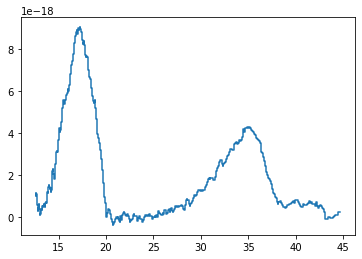

In [38]:
f, ax = plt.subplots()  
ax.step(spec.spectral_axis, spec.flux) 

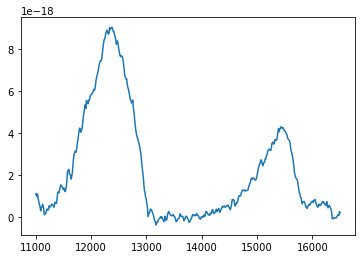

In [2]:
spec = Spectrum1D.read('CFBDSIR2.fits', format = 'tabular-fits' )
plt.plot(spec.wavelength, spec.flux)
plt.show()

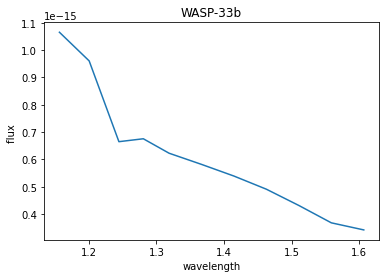

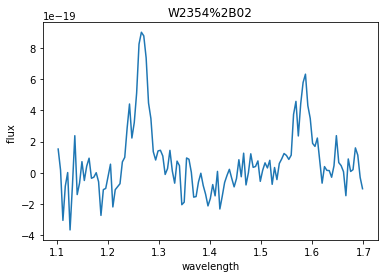

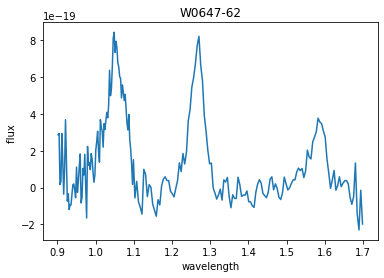

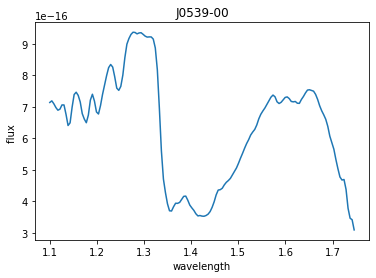

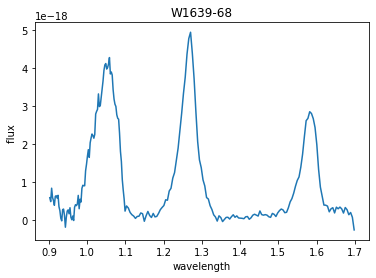

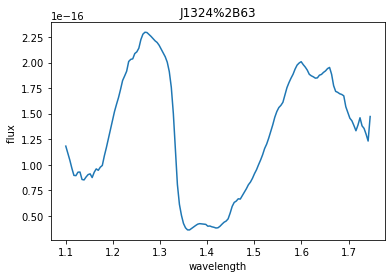

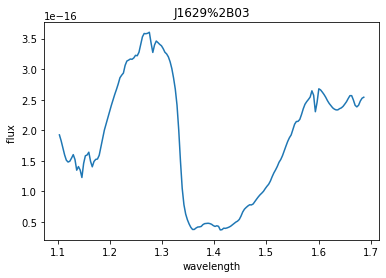

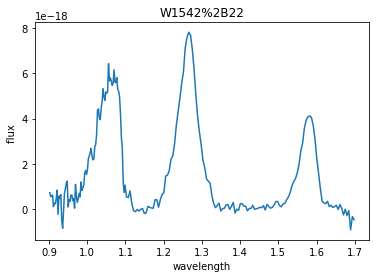

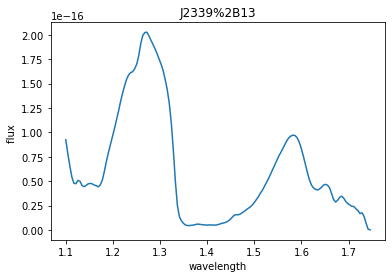

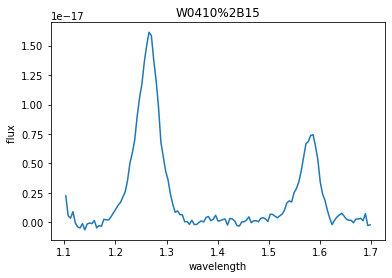

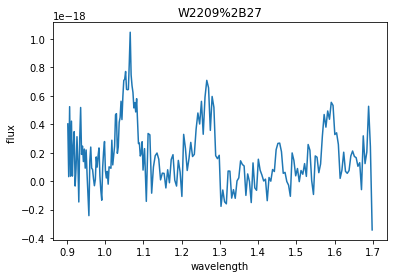

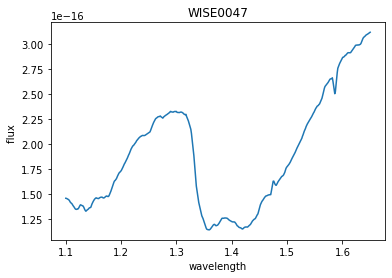

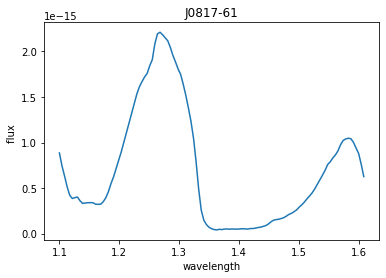

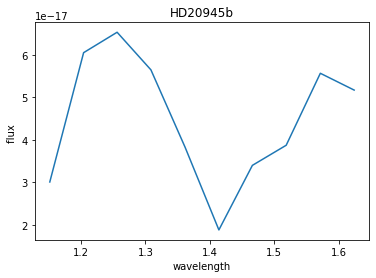

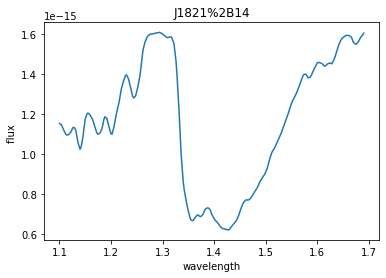

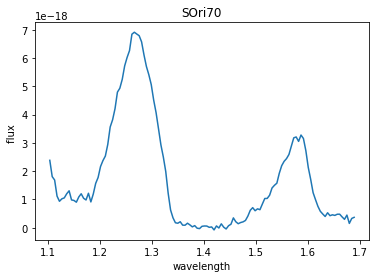

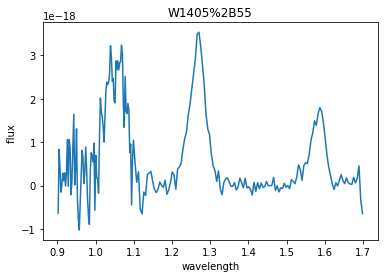

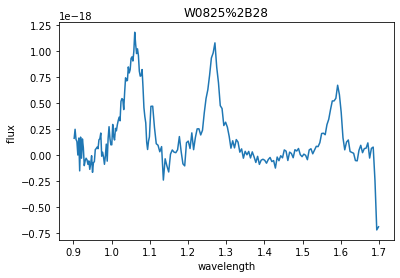

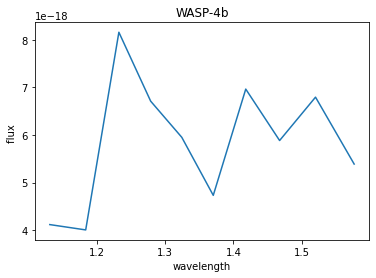

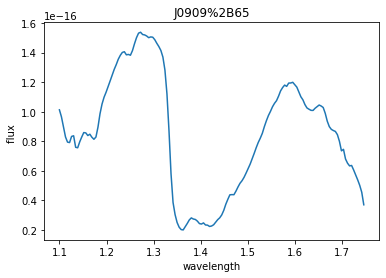

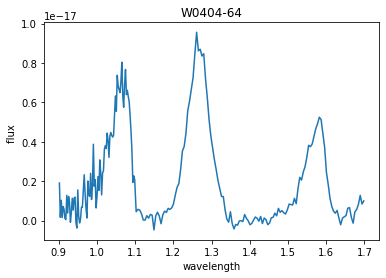

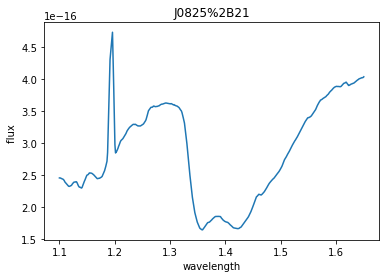

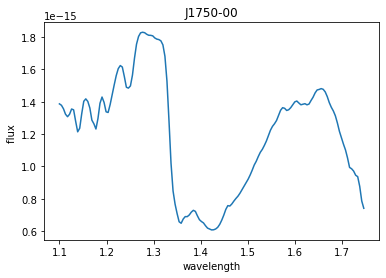

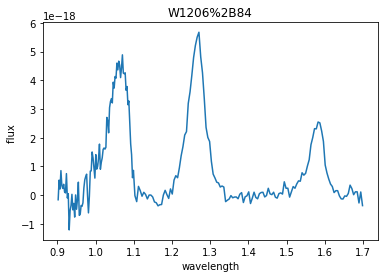

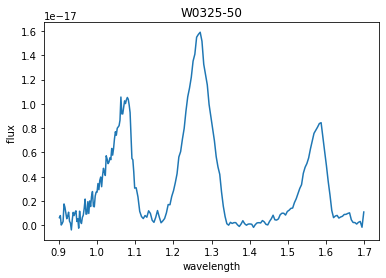

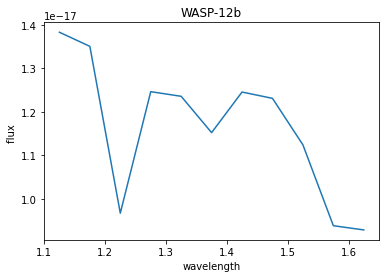

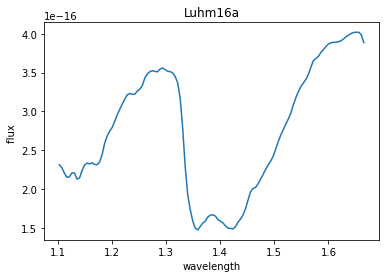

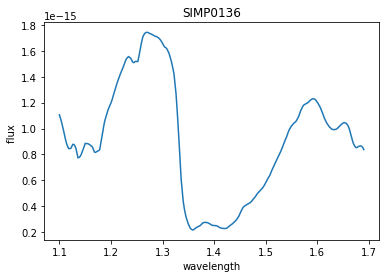

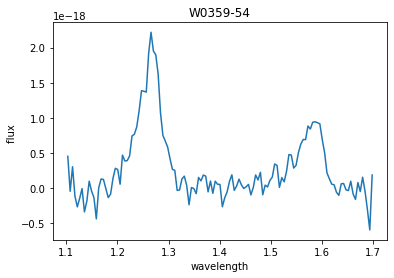

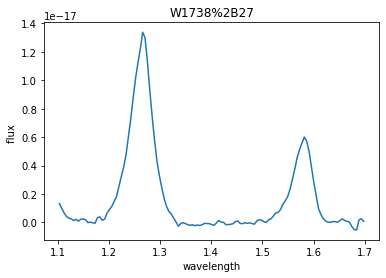

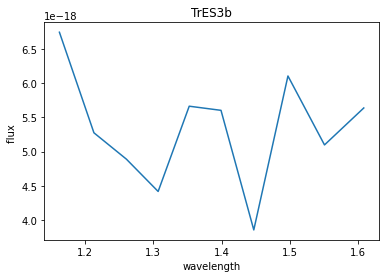

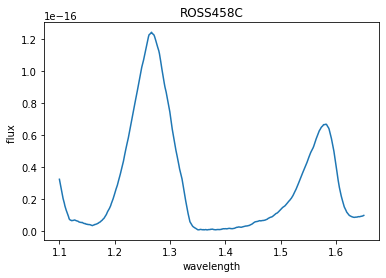

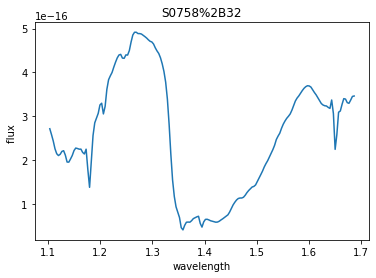

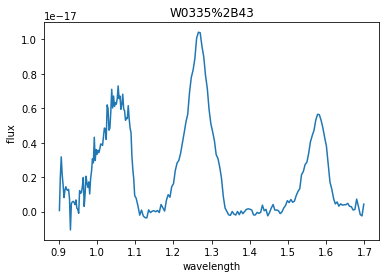

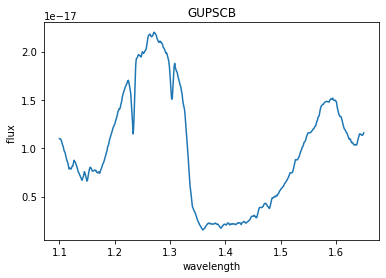

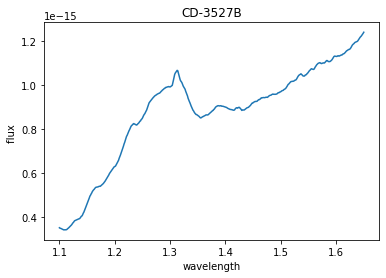

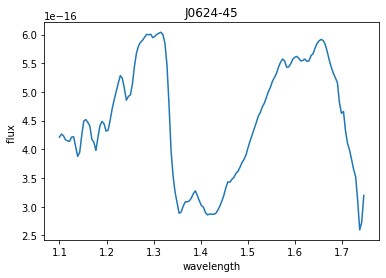

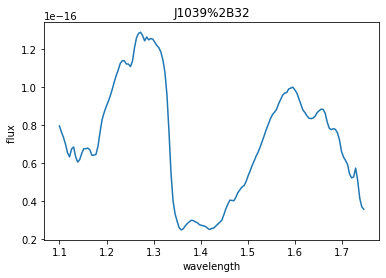

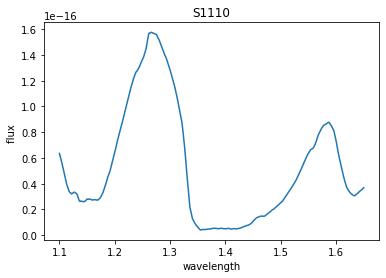

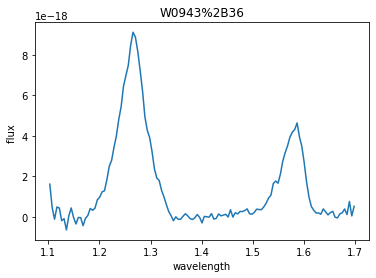

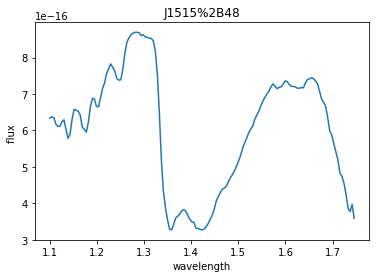

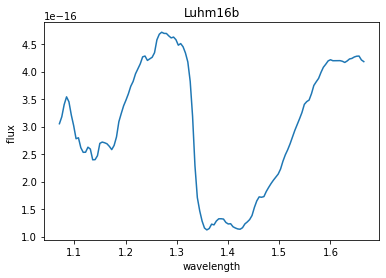

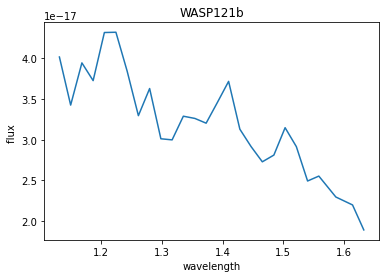

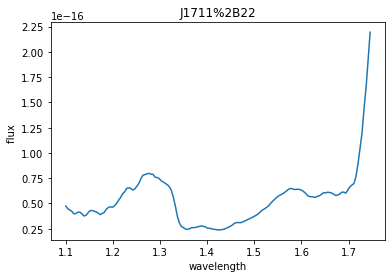

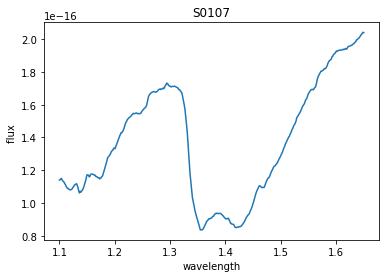

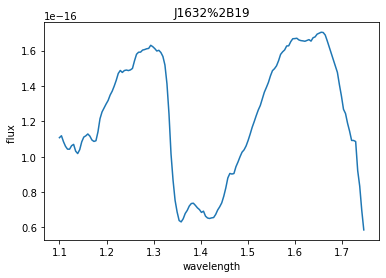

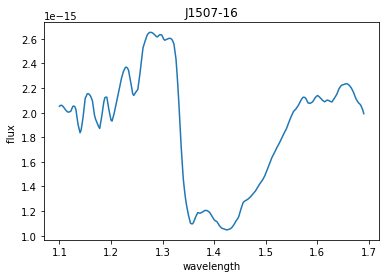

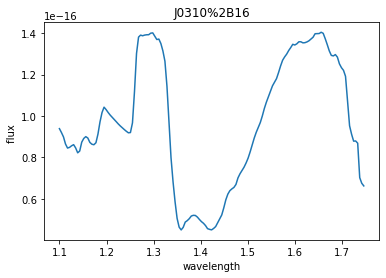

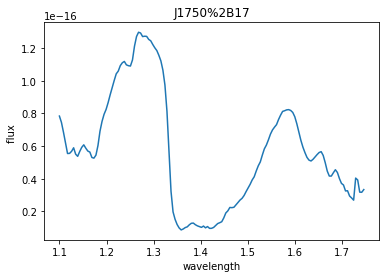

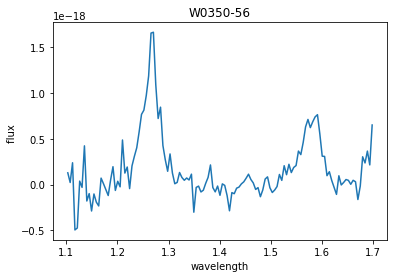

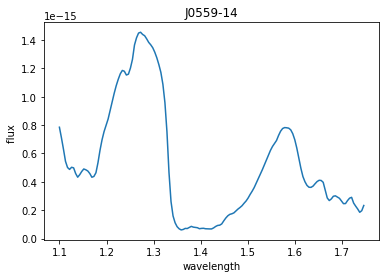

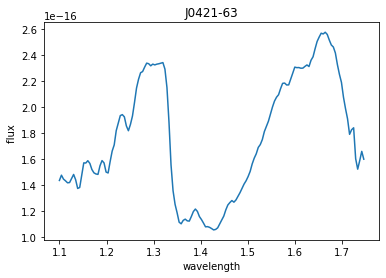

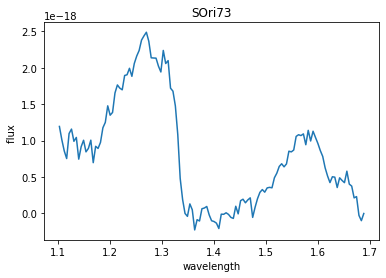

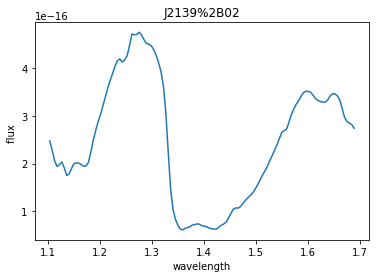

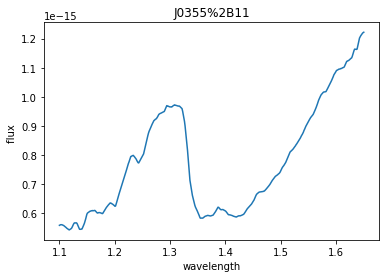

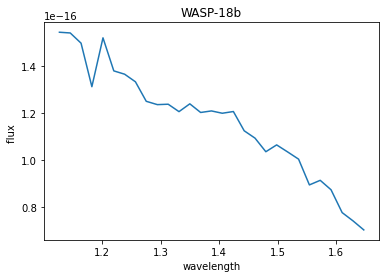

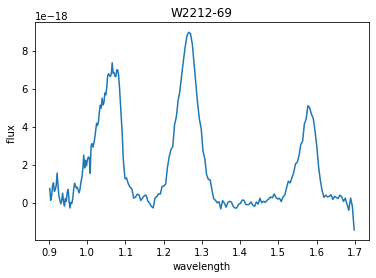

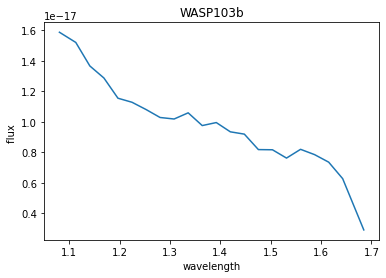

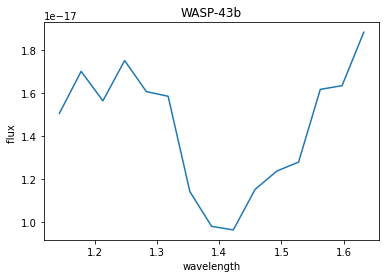

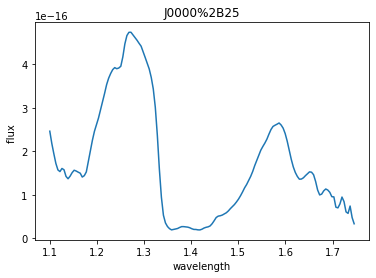

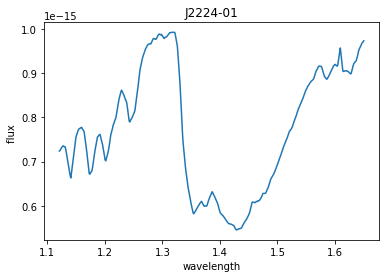

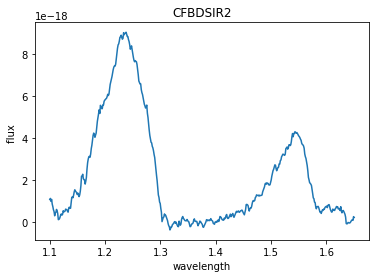

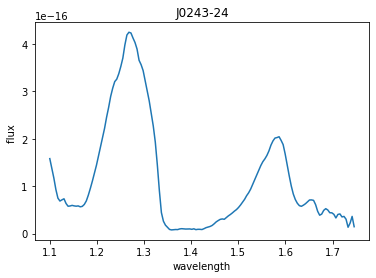

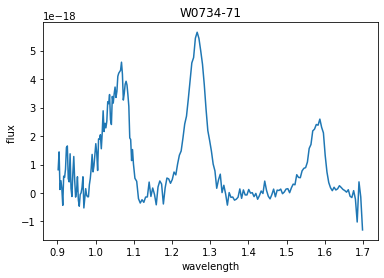

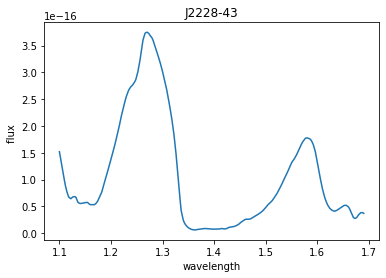

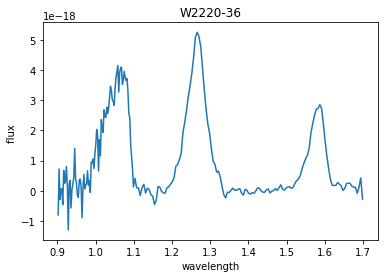

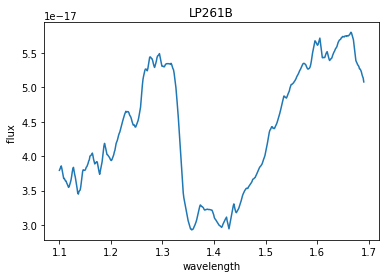

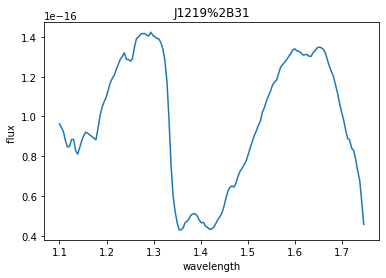

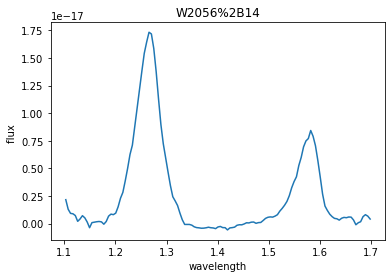

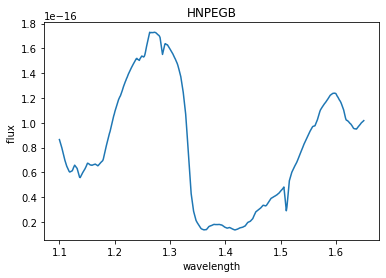

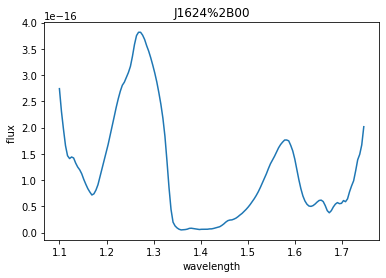

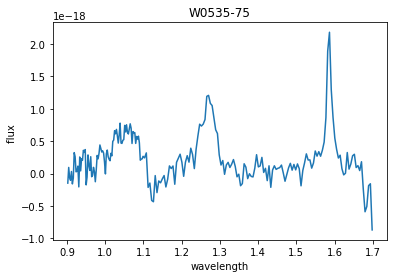

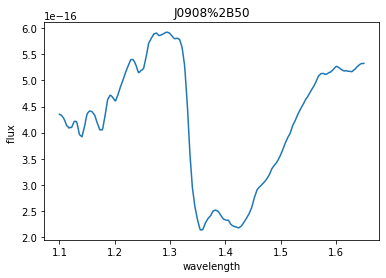

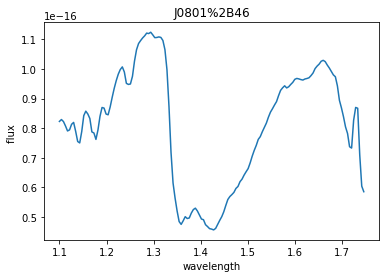

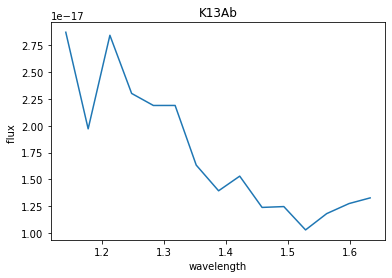

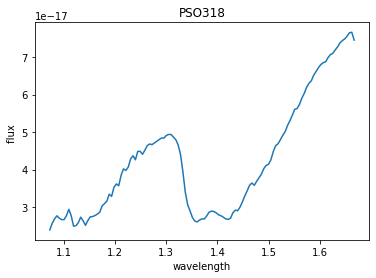

In [9]:
files = glob('*.fits')
fits_data_dir = 'pngs/'

for file_name in files:

    data = pyfits.getdata(file_name)
    name = file_name[:-len('.fits')] # Remove .fits from the file name

    wavelength       = data['wavelength']
    flux = data['flux']
    plt.plot(wavelength, flux)

    plt.xlabel('wavelength')
    plt.ylabel('flux ')
    plt.title(name)

    plt.savefig(fits_data_dir + name + '.png')
    plt.show()
